In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("/Users/AB/OneDrive/Documents/Datasets/Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df = df.rename(columns={"Annual Income (k$)":"Annual Income", "Spending Score (1-100)":"Spending Score"})
df.head(2)

,CustomerID,Gender,Age,Annual Income,Spending Score
0,1,Male,19,15,39
1,2,Male,21,15,81


### Descriptive Statistics of Data 

In [4]:
df.describe()

,CustomerID,Age,Annual Income,Spending Score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


### Checking for missing values

In [5]:
df.isnull().sum()

CustomerID        0
Gender            0
Age               0
Annual Income     0
Spending Score    0
dtype: int64

### Categorizing Age for Visualization Purposes

In [6]:
df.loc[(df.Age <= 30), 'AgeGroup'] = '18-30'
df.loc[((df.Age >= 31) & (df.Age <= 49)), 'AgeGroup'] = '31-49'
df.loc[(df.Age >= 50), 'AgeGroup'] = '50-70'

df.head()

,CustomerID,Gender,Age,Annual Income,Spending Score,AgeGroup
0,1,Male,19,15,39,18-30
1,2,Male,21,15,81,18-30
2,3,Female,20,16,6,18-30
3,4,Female,23,16,77,18-30
4,5,Female,31,17,40,31-49


### Checking for data distribution

The data in annual income and spending score seems to follow a near normal distribution, while Age is slightly abnormal. This means that the mean median and mode are almost equal for Annual Income and Spending Score and far off for Age data.  

The data on the whole is a bit biased as there are more data points on Female than on Male.  

In [7]:
df['Gender'].value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

<AxesSubplot:xlabel='Annual Income', ylabel='Density'>

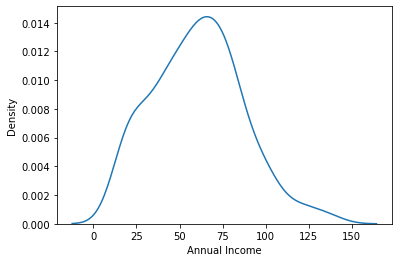

In [8]:
sns.kdeplot(data=df, x="Annual Income")

<AxesSubplot:xlabel='Age', ylabel='Density'>

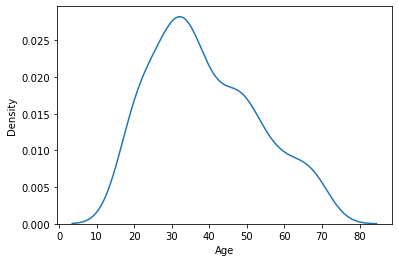

In [9]:
sns.kdeplot(data=df, x="Age")

<AxesSubplot:xlabel='Spending Score', ylabel='Density'>

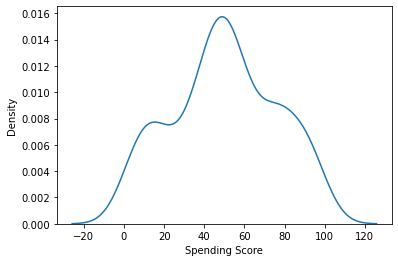

In [10]:
sns.kdeplot(data=df, x="Spending Score")

### Relation between Age vs Income and Age vs Spending Score

There is no definite relation between age and income. The plot shows that the income is spread all over the ages. 
However, there seems to be a conclusive evidence that relatively young people spend more when compared to people above 45 yrs. 

Additionally, the scatter plot between Age and Spending Score do not give a correct idea of number of clusters it can form.

<AxesSubplot:xlabel='Age', ylabel='Annual Income'>

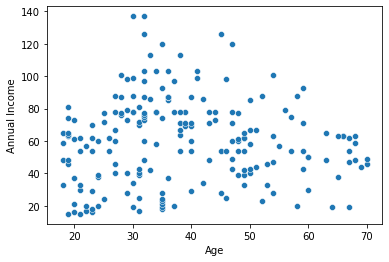

In [11]:
sns.scatterplot(data=df, x="Age", y="Annual Income")

<AxesSubplot:xlabel='Age', ylabel='Spending Score'>

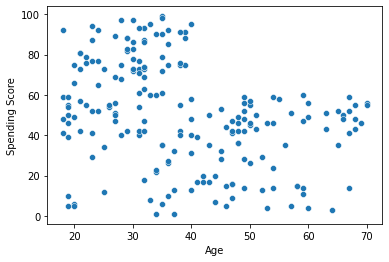

In [12]:
sns.scatterplot(data=df, x="Age", y="Spending Score")

### What's the relation like between Gender, AgeGroup and Spending Score?

On a higher level, the data suggests that Female have a high spending score as compared to Male. This could be one of the effects of data being slightly unbalanced towards Female. 

However, it is observed from the second plot that Male in the AgeGroup 31-49 tend to spend as much as Female in this AgeGroup. 

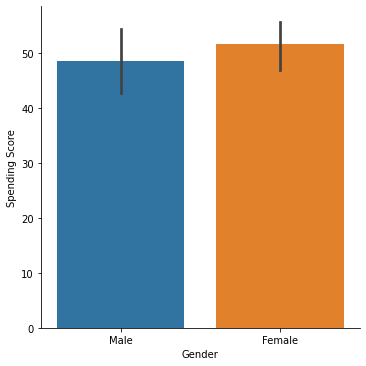

In [13]:
sns.catplot(data=df, x="Gender", y="Spending Score", kind='bar')

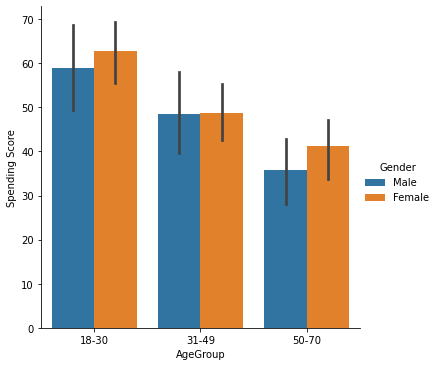

In [14]:
sns.catplot(data=df, x="AgeGroup", y="Spending Score", hue='Gender', kind='bar')

### What is the customer spending behavior in terms of their income? 

While there is no overall trend, it can be said that people with relatively low income indulge in spending econonimcally as well as lavishly, the same is the case with people with high income. But, people with moderate income (40-70k) tend to spend moderately. 

<AxesSubplot:xlabel='Annual Income', ylabel='Spending Score'>

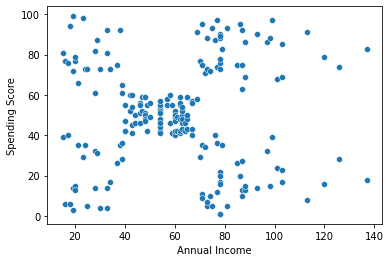

In [15]:
sns.scatterplot(data=df, x="Annual Income", y='Spending Score')

### Study which AgeGroup is contributing towards high spending score in low income group

From the below plot, it is clear that the high spending in low income group is majorly contributed by people in the AgeGroup 18-30 and particularly youngsters between age 18-28. To further drill down, people of age 21-23 spend most. 

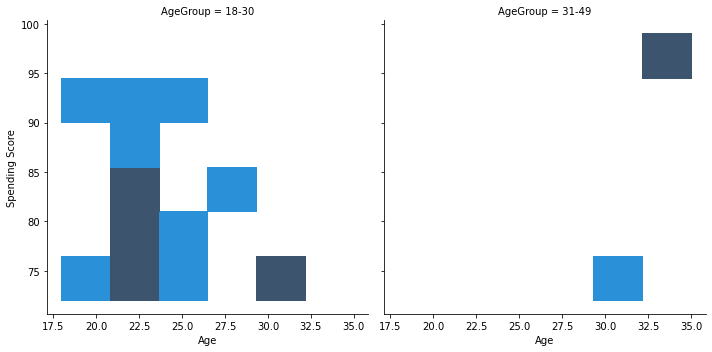

In [16]:
temp_df = df.loc[(df['Annual Income'] < 40) & (df['Spending Score'] > 70), :]

sns.displot(data=temp_df, x="Age", y="Spending Score", col="AgeGroup")

# Clustering

### Dropping categorical columns and normalizing the values between 0-1

In [17]:
cluster_df = df.drop(['Gender', 'AgeGroup', "CustomerID"], axis=1)
cluster_df.head(2)

,Age,Annual Income,Spending Score
0,19,15,39
1,21,15,81


In [18]:
col_names = ['Age', 'Annual Income', 'Spending Score']
features = cluster_df[col_names]

scaler = MinMaxScaler()
scaler.fit(features.values)
features = scaler.transform(features.values)

cluster_df[col_names] = features

In [19]:
cluster_df.head()

,Age,Annual Income,Spending Score
0,0.019231,0.000000,0.387755
1,0.057692,0.000000,0.816327
2,0.038462,0.008197,0.051020
3,0.096154,0.008197,0.775510
4,0.250000,0.016393,0.397959


### Scatter plot to check the ideal number of K visually

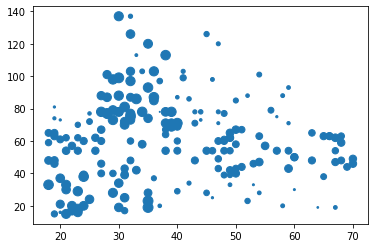

In [20]:
plt.scatter(df.Age, df['Annual Income'], df['Spending Score'])

#### Since the above scatter plot doesn't suggest the ideal number of K's, we will make use of Elbow plot to determine the ideal K

# Elbow Plot

In [21]:
k_range = range(1,10)
sse = []

for k in k_range:
    km = KMeans(n_clusters=k)
    km.fit(cluster_df)
    sse.append(km.inertia_)

C:\Users\AB\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:882: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  f"KMeans is known to have a memory leak on Windows "


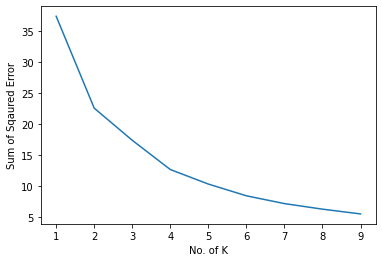

In [22]:
plt.xlabel("No. of K")
plt.ylabel("Sum of Sqaured Error")
plt.plot(k_range, sse)

### Considering the Elbow point at 4, we will go ahead with K=4 and fit K - Means Clustering technique 

In [23]:
km = KMeans(n_clusters=4)
y_pred = km.fit_predict(cluster_df)

cluster_df['Cluster'] = y_pred

### The centroids of each cluster  

In [24]:
km.cluster_centers_

array([[0.28605769, 0.58278689, 0.82168367],
       [0.69201183, 0.26809584, 0.39764521],
       [0.14304993, 0.20491803, 0.60508414],
       [0.41093117, 0.58606557, 0.1895811 ]])

### Assigning a new dataframe for each cluster for better visualization 

In [27]:
cluster_df_0 = cluster_df[cluster_df.Cluster == 0]
cluster_df_1 = cluster_df[cluster_df.Cluster == 1]
cluster_df_2 = cluster_df[cluster_df.Cluster == 2]
cluster_df_3 = cluster_df[cluster_df.Cluster == 3]

### Plotting the final cluster with respect to Annual Income and Spending Scores

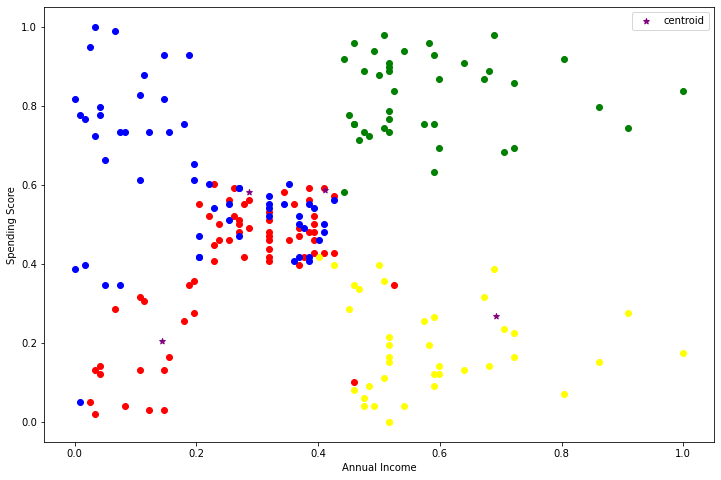

In [29]:
plt.figure(figsize=(12,8))
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")

plt.scatter(cluster_df_0['Annual Income'], cluster_df_0['Spending Score'], color='green', )
plt.scatter(cluster_df_1['Annual Income'], cluster_df_1['Spending Score'], color='red')
plt.scatter(cluster_df_2['Annual Income'], cluster_df_2['Spending Score'], color='blue')
plt.scatter(cluster_df_3['Annual Income'], cluster_df_3['Spending Score'], color='yellow')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.legend()

### Plotting the final cluster with respect to Age and Spending Scores 

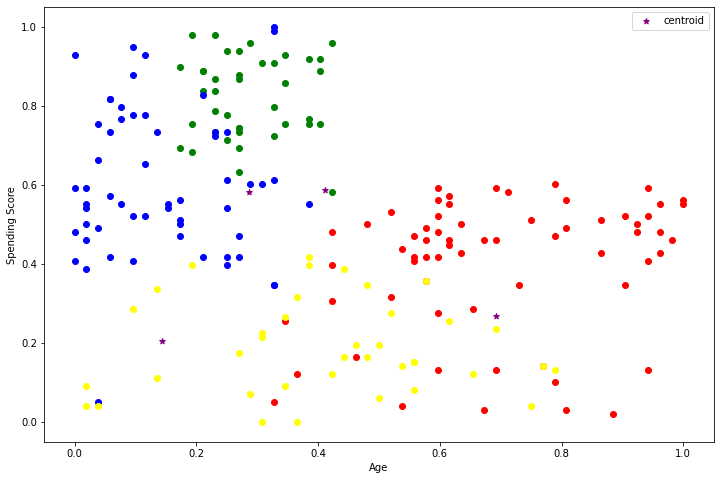

In [30]:
plt.figure(figsize=(12,8))
plt.xlabel("Age")
plt.ylabel("Spending Score")

plt.scatter(cluster_df_0['Age'], cluster_df_0['Spending Score'], color='green', )
plt.scatter(cluster_df_1['Age'], cluster_df_1['Spending Score'], color='red')
plt.scatter(cluster_df_2['Age'], cluster_df_2['Spending Score'], color='blue')
plt.scatter(cluster_df_3['Age'], cluster_df_3['Spending Score'], color='yellow')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.legend()